# Famous Opinion Dynamic Models

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

## DeGroot Model

### Convert to row stochastic Matrix
This code uses the method of the Sinkhorn paper:

Sinkhorn, R. (1964). A relationship between arbitrary positive matrices and doubly stochastic matrices. The Annals of Mathematical Statistics, 35(2):876–879.)

In [5]:
def converged_test_stochastic(matrix, threshold=0.0000001):
    localMatrix = np.copy(matrix).astype(float);
    e1 = sum(abs(np.sum(localMatrix , axis = 0) - 1));
    e2 = sum(abs(np.sum(localMatrix , axis = 1) - 1));
    return (e2) > threshold
    
def one_step_stochastic(matrix):
    """ Here we will do one step towards
        Making a given matrix a bio-stochastic one        
        It does what OneStep does                         
    """
    # copy the input so that the original input is not changed.
    localMatrix = np.copy(matrix).astype(float);
    
    # Divide each row by sum of the entries in the given row.
    localMatrix = np.dot(np.diag(1/np.sum(localMatrix, axis=1)), localMatrix);
    return localMatrix

def make_stochastic(matrix):
    localMatrix = np.copy(matrix).astype(float);
    while (converged_test_stochastic(localMatrix)):
        localMatrix = one_step_stochastic(localMatrix);
    return localMatrix

### An Example

In [8]:
np.random.seed(100)
pop_size = 10
no_time_steps = 100

# initial opinion of agents at time t=0
initial_opinions = abs(np.random.randn(pop_size,))

# Build the trust matrix (weighted adjacency matrix)
trust_matrix = abs(np.random.randn(pop_size,pop_size))
trust_matrix = make_stochastic(trust_matrix)

# Initialize history of evolution
r_evolution_of_opinions = np.zeros((pop_size, no_time_steps)) 
r_evolution_of_opinions[:,0] = initial_opinions

# Do the game
for time_step in xrange(1,no_time_steps):
    r_evolution_of_opinions[:,time_step] = np.dot(trust_matrix, r_evolution_of_opinions[:,time_step-1])

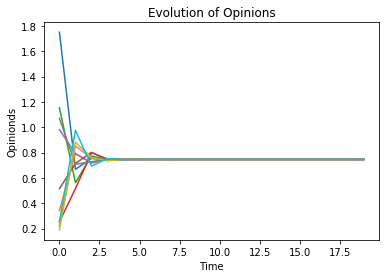

In [9]:
fig = plt.figure()
plt.plot(r_evolution_of_opinions[:,:20].T)
plt.xlabel('Time')
plt.ylabel('Opinionds')
plt.title('Evolution of Opinions')
plt.show()

### Non Convergent Example

In [10]:
pop_size = 3
no_time_steps = 100

# initial opinion of agents at time t=0
initial_opinions = abs(np.random.randn(pop_size,))

# Build the trust matrix (weighted adjacency matrix)
trust = np.array([[0, .5, .5],[1. , 0., 0.], [1., 0., 0.]])

# Initialize history of evolution
non_conv_evolution = np.zeros((pop_size, no_time_steps)) 
non_conv_evolution[:,0] = initial_opinions

# Do the game
for time_step in xrange(1,no_time_steps):
    non_conv_evolution[:,time_step] = np.dot(trust, non_conv_evolution[:,time_step-1])

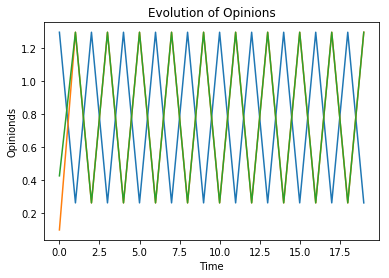

In [11]:
fig1 = plt.figure()
plt.plot(non_conv_evolution[:,:20].T)
plt.xlabel('Time')
plt.ylabel('Opinionds')
plt.title('Evolution of Opinions')
plt.show()

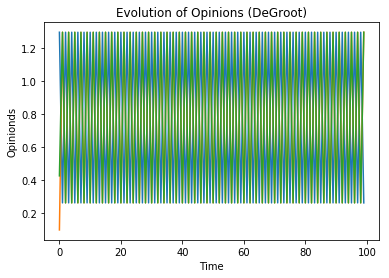

In [12]:
fig2 = plt.figure()
plt.plot(non_conv_evolution.T)
plt.xlabel('Time')
plt.ylabel('Opinionds')
plt.title('Evolution of Opinions (DeGroot)')
plt.show()